In [1]:
#EJERCICIO 5
#Entrena un modelo en Keras que use 3 tipos de regularización y use capas
#convolucionales pero no uses capas densas ni recurrentes (pista, piensa bien las capas de
#pooling). El modelo ha de usarse para resolver el problema de clasificación con los datos
#CIFAR100 que están en Keras. Razona sobre la evolución del error en las curvas de
#entrenamiento.
#Compara los tiempos de entrenamiento y predicción con y sin GPU (usando tu GPU o la de
#Colab).

#Ejemplo de CNN 2D en la base de datos cifar100 ESTA HECHO EN LA CARPETA CONVOLUCIONALES, SCRIPS CNN 2D en la base de datos cifar100

In [21]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation,LSTM, GRU, Conv2D,MaxPooling2D, Flatten, Dropout,Convolution1D, Dense, MaxPooling1D
from tensorflow.keras.losses import sparse_categorical_crossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import BatchNormalization
!pip install Padding
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
#Descargamos los datos cifar100 y los partimos en train y test
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.cifar100.load_data()

In [6]:
#Determino la forma de los datos
img_width, img_pesos, img_num_canales = 32, 32, 3
input_shape = (img_width, img_pesos, img_num_canales)

In [7]:
#Tamaño de los datos (#datos,#lado,#alto,#canales)
print(y_train.shape)

(50000, 1)


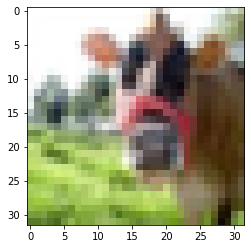

In [8]:
#Veo la primera imagen del dataset
plt.imshow(X_train[0],cmap="gray")

In [9]:
#Normalizo las imagenes
X_train = X_train / 255
X_test = X_test / 255

In [15]:
#Creo el modelo
model_5 = Sequential()

model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
model_5.add(MaxPooling2D(pool_size=(2, 2)))
model_5.add(Flatten())

In [17]:
#CompilO el modelo
model_5.compile(optimizer='adam', loss='mae', metrics=['accuracy'])

In [18]:
#Veo el resumen del modelo
model_5.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_11 (Conv2D)           (None, 30, 30, 32)        896       
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_12 (Conv2D)           (None, 13, 13, 64)        18496     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 6, 6, 64)          0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 4, 4, 32)          18464     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 2, 2, 32)          0         
_________________________________________________________________
flatten_3 (Flatten)          (None, 128)              

In [19]:
#Entreno el modelo
history = model_5.fit(X_train, y_train,
            batch_size=50,
            epochs=10, #poner 100 luego
            verbose=1,
            validation_split=0.2)

Epoch 1/10
800/800 [==============================] - 67s 80ms/step - loss: 26.8318 - accuracy: 0.0080 - val_loss: 25.9954 - val_accuracy: 0.0069
Epoch 2/10
800/800 [==============================] - 64s 80ms/step - loss: 25.5273 - accuracy: 0.0087 - val_loss: 25.9249 - val_accuracy: 0.0079
Epoch 3/10
800/800 [==============================] - 67s 83ms/step - loss: 25.4845 - accuracy: 0.0083 - val_loss: 25.8520 - val_accuracy: 0.0080
Epoch 4/10
800/800 [==============================] - 68s 86ms/step - loss: 25.3993 - accuracy: 0.0087 - val_loss: 25.6878 - val_accuracy: 0.0100
Epoch 5/10
800/800 [==============================] - 66s 82ms/step - loss: 25.3178 - accuracy: 0.0073 - val_loss: 25.7091 - val_accuracy: 0.0084
Epoch 6/10
800/800 [==============================] - 65s 81ms/step - loss: 25.2475 - accuracy: 0.0082 - val_loss: 26.2796 - val_accuracy: 0.0088
Epoch 7/10
800/800 [==============================] - 65s 81ms/step - loss: 25.1990 - accuracy: 0.0077 - val_loss: 25.4524 -

In [20]:
#Generalizo las metricas del modelo
score = model_5.evaluate(X_test, y_test)
score

313/313 [==============================] - 8s 22ms/step - loss: 25.0497 - accuracy: 0.0081


[25.049732208251953, 0.008100000210106373]

In [ ]:
#Sin GPU de colab
early_stopping_no_gpu = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 
%time hist = model_5.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=10, callbacks=early_stop) #pasarle mas epoca

In [ ]:
#Sin GPU de Colab
%time score_no_gpu = model_5.evaluate(X_test,y_test)
score_no_gpu

In [ ]:
#Con GPU de colab
early_stopping_con_gpu = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=10) 
%time hist_con_gpu = model_5.fit(X_train, y_train, validation_split=0.2, batch_size=64, epochs=20, callbacks=early_stop)

In [ ]:
# Con GPU de Colab
%time score_con_gpu = model_5.evaluate(X_test,y_test)
score_con_gpu

In [ ]:
#Como podemos comprobar al utilizar la GPU el procesamiento del modelo es claramente mucho mas superior a trabajr sin la GPU, esto es debido a que estamos utilizando la tarjeta grafica a su maxima expresion

In [ ]:
#Veo como convergen
%matplotlib inline
plt.figure
plt.plot(hist.history['loss'], label='Pérdida entrenamiento')
plt.plot(hist.history['val_loss'], 'r', label='Pérdida test')
plt.legend()